# HW4
### Xin Zou

In [28]:
%pylab inline
import pandas as pd
import os
from ipypublish import nb_setup
%load_ext rpy2.ipython

Populating the interactive namespace from numpy and matplotlib
The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [29]:
%%R
library(tm)
library(plyr)
library(httr)
library(stringr)
library(wordcloud)

In [30]:
%%R
text = readLines("ascii_bible.txt")
text = as.array(text)

## Q1:Print the top 20 verses

In [31]:
%%R
t1 = text[3:length(text)]
head(t1)

[1] "001:001 In the beginning God created the heaven and the earth."     
[2] ""                                                                   
[3] "001:002 And the earth was without form, and void; and darkness was" 
[4] "        upon the face of the deep. And the Spirit of God moved upon"
[5] "        the face of the waters."                                    
[6] ""                                                                   


In [32]:
%%R
t1 = t1[grep("[A-Za-z]",t1)]
t1=sub("        ","",t1)

In [33]:
%%R
head(t1,10)

 [1] "001:001 In the beginning God created the heaven and the earth."      
 [2] "001:002 And the earth was without form, and void; and darkness was"  
 [3] "upon the face of the deep. And the Spirit of God moved upon"         
 [4] "the face of the waters."                                             
 [5] "001:003 And God said, Let there be light: and there was light."      
 [6] "001:004 And God saw the light, that it was good: and God divided the"
 [7] "light from the darkness."                                            
 [8] "001:005 And God called the light Day, and the darkness he called"    
 [9] "Night. And the evening and the morning were the first day."          
[10] "001:006 And God said, Let there be a firmament in the midst of the"  


In [34]:
%%R
t1 = str_replace_all(t1,"[\"]","")
idx = which(nchar(t1)==0)
t2 = t1[setdiff(seq(1,length(t1)),idx)]
head(t2,20)

 [1] "001:001 In the beginning God created the heaven and the earth."       
 [2] "001:002 And the earth was without form, and void; and darkness was"   
 [3] "upon the face of the deep. And the Spirit of God moved upon"          
 [4] "the face of the waters."                                              
 [5] "001:003 And God said, Let there be light: and there was light."       
 [6] "001:004 And God saw the light, that it was good: and God divided the" 
 [7] "light from the darkness."                                             
 [8] "001:005 And God called the light Day, and the darkness he called"     
 [9] "Night. And the evening and the morning were the first day."           
[10] "001:006 And God said, Let there be a firmament in the midst of the"   
[11] "waters, and let it divide the waters from the waters."                
[12] "001:007 And God made the firmament, and divided the waters which were"
[13] "under the firmament from the waters which were above the"             

In [35]:
%%R
t3 = strsplit(paste(t1,collapse=" "),"(?<=.)(?=([0:9]..:[0-9]..))",perl = TRUE)[[1]]

In [36]:
%%R
head(t3,20)

 [1] "001:001 In the beginning God created the heaven and the earth. "                                                                                                                          
 [2] "001:002 And the earth was without form, and void; and darkness was upon the face of the deep. And the Spirit of God moved upon the face of the waters. "                                  
 [3] "001:003 And God said, Let there be light: and there was light. "                                                                                                                          
 [4] "001:004 And God saw the light, that it was good: and God divided the light from the darkness. "                                                                                           
 [5] "001:005 And God called the light Day, and the darkness he called Night. And the evening and the morning were the first day. "                                                             
 [6] "001:006 And God said, Let the

## Q2: How many verses are there in total?

In [37]:
%%R
print(length(t3))

[1] 30210


## Q3: How many chapters are there?

In [38]:
%%R
print(t3[30205:30210])

[1] "022:016 I Jesus have sent mine angel to testify unto you these things in the churches. I am the root and the offspring of David, and the bright and morning star. "                                                      
[2] "022:017 And the Spirit and the bride say, Come. And let him that heareth say, Come. And let him that is athirst come. And whosoever will, let him take the water of life freely. "                                       
[3] "022:018 For I testify unto every man that heareth the words of the prophecy of this book, If any man shall add unto these things, God shall add unto him the plagues that are written in this book: "                    
[4] "022:019 And if any man shall take away from the words of the book of this prophecy, God shall take away his part out of the book of life, and out of the holy city, and from the things which are written in this book. "
[5] "022:020 He which testifieth these things saith, Surely I come quickly. Amen. Even so, come, Lord Jesus.

After check the last few verses, we can see it has 22 Chapters

## Q4: Extract an array for the verse numbers, and also one for the verse text.

In [39]:
%%R
A1 = strsplit(paste(t2,collapse=" "),"[0:9]..:[0-9]..")[[1]]

In [40]:
%%R
print(head(A1,10))

 [1] ""                                                                                                                                                  
 [2] " In the beginning God created the heaven and the earth. "                                                                                          
 [3] " And the earth was without form, and void; and darkness was upon the face of the deep. And the Spirit of God moved upon the face of the waters. "  
 [4] " And God said, Let there be light: and there was light. "                                                                                          
 [5] " And God saw the light, that it was good: and God divided the light from the darkness. "                                                           
 [6] " And God called the light Day, and the darkness he called Night. And the evening and the morning were the first day. "                             
 [7] " And God said, Let there be a firmament in the midst of the waters, an

In [41]:
%%R
A2 = strsplit(paste(t2,collapse=" "),"[A-Za-z]")[[1]]

In [42]:
%%R
A2 = A2[grep("[0:9]..:[0-9]..",A2)]

In [43]:
%%R
print(head(A2,10))

 [1] "001:001 "   ". 001:002 " ". 001:003 " ". 001:004 " ". 001:005 "
 [6] ". 001:006 " ". 001:007 " ". 001:008 " ". 001:009 " ". 001:010 "


## Q5:Lower case all text

In [44]:
%%R
A3 = tolower(A1)

In [45]:
%%R
print(head(A3,10))

 [1] ""                                                                                                                                                  
 [2] " in the beginning god created the heaven and the earth. "                                                                                          
 [3] " and the earth was without form, and void; and darkness was upon the face of the deep. and the spirit of god moved upon the face of the waters. "  
 [4] " and god said, let there be light: and there was light. "                                                                                          
 [5] " and god saw the light, that it was good: and god divided the light from the darkness. "                                                           
 [6] " and god called the light day, and the darkness he called night. and the evening and the morning were the first day. "                             
 [7] " and god said, let there be a firmament in the midst of the waters, an

## Q6:Convert the text of all verses into a Corpus using the tm package.

In [46]:
%%R
corpus = Corpus(VectorSource(A3))

## Q7:Remove all punctuation. Use a corpus function for this. How many unique words are there in the bible?

In [47]:
%%R
A4 = tm_map(corpus,removePunctuation)

In [48]:
%%R
txt = NULL
for (j in 1:length(A4)) {
  txt = c(txt,A4[[j]]$content)
}
txt = paste(txt,collapse=" ")
txt = tolower(txt)

In [49]:
%%R
tdm = TermDocumentMatrix(A4,control=list(minWordLength=1))

In [50]:
%%R
print(tdm)

<<TermDocumentMatrix (terms: 13543, documents: 30211)>>
Non-/sparse entries: 502778/408644795
Sparsity           : 100%
Maximal term length: 18
Weighting          : term frequency (tf)


Tues, we have 13543 unique terms.

## Q8: Remove all stopwords. Now how many unique terms are there?

In [51]:
%%R
A5 = tm_map(A4,removeWords,stopwords("english"))

In [52]:
%%R
tdm1 = TermDocumentMatrix(A5,control=list(minWordLength=1))

In [53]:
%%R
print(tdm1)

<<TermDocumentMatrix (terms: 13447, documents: 30211)>>
Non-/sparse entries: 331854/405915463
Sparsity           : 100%
Maximal term length: 18
Weighting          : term frequency (tf)


So, after remove stopwords, we have 13447 unique words.

## Q9:Now stem the text, to remove multiplicity of similar words of the same root

In [54]:
%%R
A6 = tm_map(A5, stemDocument)

## Q10: How many distinct words are there in the bible, after stemming?

In [55]:
%%R
tdm2 = TermDocumentMatrix(A6,control=list(minWordLength=1))

In [56]:
%%R
print(tdm2)

<<TermDocumentMatrix (terms: 10017, documents: 30211)>>
Non-/sparse entries: 328406/302295181
Sparsity           : 100%
Maximal term length: 18
Weighting          : term frequency (tf)


After temming, we have 10017 words.

## Q11: Convert the TDM into a matrix and find the 50 most common words in the bible.

In [57]:
%%R
tdm2_m <- as.matrix(tdm2)

In [58]:
%%R
term_frequency <- rowSums(tdm2_m)

In [59]:
%%R
term_frequency <- sort(term_frequency, decreasing = T)

In [60]:
%%R
term_frequency[1:50]

   shall     unto     lord     thou      god      thi     said     will 
    9838     8997     8007     5474     4727     4600     3999     3893 
    thee      son     king     upon      man      day   israel      say 
    3826     3486     2877     2748     2735     2611     2575     2532 
    hath     hous    peopl     came     come      one     hand children 
    2264     2160     2145     2093     2088     2046     1943     1821 
    also     land    thing      men   father    shalt      let     even 
    1769     1767     1704     1677     1675     1616     1512     1454 
    made     went    offer      now   behold     citi    saith     word 
    1405     1400     1368     1356     1341     1316     1262     1245 
therefor    everi     hast     name     make    great    david      may 
    1237     1236     1150     1135     1086     1081     1064     1027 
    pass    earth 
    1004      992 


## Q12: Make a wordcloud of the top 100 words in the bible.

In [61]:
%%R
word_freqs <- data.frame(
  term = names(term_frequency),
  num = term_frequency
)

head(word_freqs)

       term  num
shall shall 9838
unto   unto 8997
lord   lord 8007
thou   thou 5474
god     god 4727
thi     thi 4600


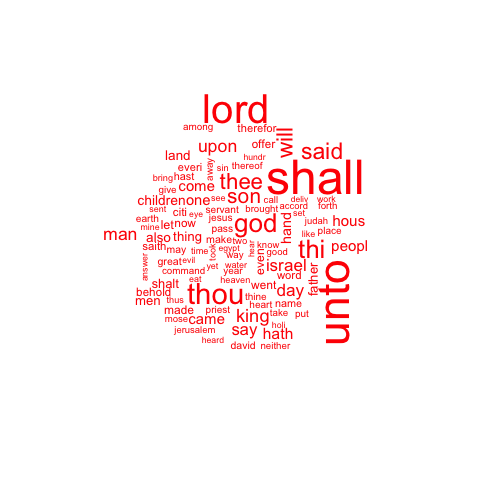

In [62]:
%%R
wordcloud(word_freqs$term, word_freqs$num,
  max.words = 100, colors = "red")

## Q13: Mood score the original text of the bible (before stemming)

In [63]:
%%R
HIDict = readLines("inqdict.txt")
dict_pos = HIDict[grep("Pos",HIDict)]
poswords = NULL
for (s in dict_pos) {
    s = strsplit(s,"#")[[1]][1]
    poswords = c(poswords,strsplit(s," ")[[1]][1])
}
dict_neg = HIDict[grep("Neg",HIDict)]
negwords = NULL
for (s in dict_neg) {
    s = strsplit(s,"#")[[1]][1]
    negwords = c(negwords,strsplit(s," ")[[1]][1])
}
poswords = tolower(poswords)
negwords = tolower(negwords)
print(sample(poswords,25))
print(sample(negwords,25))
poswords = unique(poswords)
negwords = unique(negwords)
print(length(poswords))
print(length(negwords))

 [1] "protector"        "eminence"         "understand"       "her"             
 [5] "impress"          "profitable"       "lifelong"         "gratitude"       
 [9] "benefit"          "fairness"         "greet"            "verification"    
[13] "mutual"           "fine"             "allow"            "enchantment"     
[17] "poise"            "insight"          "definitive"       "indispensability"
[21] "legal"            "necessarily"      "content"          "alertness"       
[25] "prosperity"      
 [1] "sick"         "monstrous"    "rattle"       "dirty"        "incalculable"
 [6] "confiscation" "bafflement"   "mutter"       "disturbance"  "abdicate"    
[11] "box"          "threaten"     "shoot"        "trouble"      "impure"      
[16] "complexity"   "wane"         "assailant"    "indecision"   "sullen"      
[21] "unfriendly"   "banal"        "disorder"     "wreck"        "deterrent"   
[1] 1647
[1] 2121


In [64]:
%%R
mood = unlist(strsplit(A3," "))

In [66]:
%%R
print(head(mood,10))

 [1] ""          "in"        "the"       "beginning" "god"       "created"  
 [7] "the"       "heaven"    "and"       "the"      


In [67]:
%%R
posmatch = match(mood,poswords)
numposmatch = length(posmatch[which(posmatch>0)])
negmatch = match(mood,negwords)
numnegmatch = length(negmatch[which(negmatch>0)])
print(c(numposmatch,numnegmatch))

[1] 48141 30617


We can see that positive words are more than negative words, so bible has a positive mood.

## Q14: Summarize the bible into less than 500 verses.

In [ ]:
%%R
text_summary = function(text, n) {
  m = length(text)  
  jaccard = matrix(0,m,m)  
  for (i in 1:m) {
    for (j in i:m) {
      a = text[i]; aa = unlist(strsplit(a," "))
      b = text[j]; bb = unlist(strsplit(b," "))
      jaccard[i,j] = length(intersect(aa,bb))/
                          length(union(aa,bb))
      jaccard[j,i] = jaccard[i,j]
    }
  }
  similarity_score = rowSums(jaccard)
  res = sort(similarity_score, index.return=TRUE,
          decreasing=TRUE)
  idx = res$ix[1:n]
  summary = text[idx]
}

In [ ]:
%%R
res = text_summary(A1,5)
print(res)

## Q15: Find the main 3 topics in the bible, and the top 25 words in each topic. Can you find an interpretation of each topic?

%%R
library(topicmodels)

In [68]:
%%R
dtm <- DocumentTermMatrix(A4)

In [74]:
%%R
dim(dtm)

[1] 30211 13543


In [76]:
%%R
raw.sum=apply(dtm,1,FUN=sum) 

In [77]:
%%R
dtm=dtm[raw.sum!=0,]   #remove NA rows

In [69]:
%%R
k = 3
burnin = 5000
iter = 4000
thin = 100
seed = 1234
nstart = 5
best = TRUE

In [ ]:
%%R
#Run LDA
res1 <-LDA(dtm, k , method="Gibbs", control = list(nstart = nstart, seed = seed, best = best, burnin = burnin, iter = iter, thin = thin))

#Show topics
res.topics = as.matrix(topics(res))
print(head(res.topics),3)

#Show top terms
res.terms = as.matrix(terms(res,25))
print(res.terms)


THE END